## Time-Series ananysis
To manage the high imbalance in time series dataset, different standard classifier models were tested on the base dataset and different rolling time serries of the same data, using different time windows: 2hrs, 16 hrs, 24 hrs, 48 hrs

### Conclusion:
The time transformations have not improved the performance

In general, the original data performs well, which indicates, there is not need to implement rolling time transformations

### Model Performance:
GradientBoost has the best overall performance and balance of metrics
RandomForest and AdaBoost are also considerably performing well
DecissionTree, IsolatiionForest and BernoulliNB are uderperforming and not considered for furhter assessment

### Potential hidden issues:
Data leakage is not an option as the test, train dataset is "cut" by the explicit time and the orignal test dataset was used for the rolling data also
!! Evaluate precission recall curves -> test if the dataset is recognising the failure or classifies everything as positive
Try different models like LSTM and autoencoders

In [1]:
import pandas as pd

from sklearn.model_selection import TimeSeriesSplit

from src.time_series_transformations import calculate_rolling_stats
from src.visualisations import time_window_rolling_stats
from src.standard_models import classifier_model_test
from src.data_transformations import test_train_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_parquet("data/clean/sensor_clean.pqt")
df = df.drop(columns=['day_of_week','month','hour'])

In [3]:
# Define the time windows (in minutes)
time_windows = [120, 960, 1440, 2880]

# Define the metric columns
metric_columns = [
    'sensor_00',
    'sensor_04',
    'sensor_10',
    'sensor_06',
    'sensor_11',
    'sensor_07',
    'sensor_02',
]

# Transform "Recovey" status into error term
df['machine_status_code'] = df['machine_status_code'].replace({2 : 1})

# Create an error dataset for reference check
df_error = df[df['machine_status_code'] == 1]

In [4]:
df_rolling = calculate_rolling_stats(df,time_windows,metric_columns)

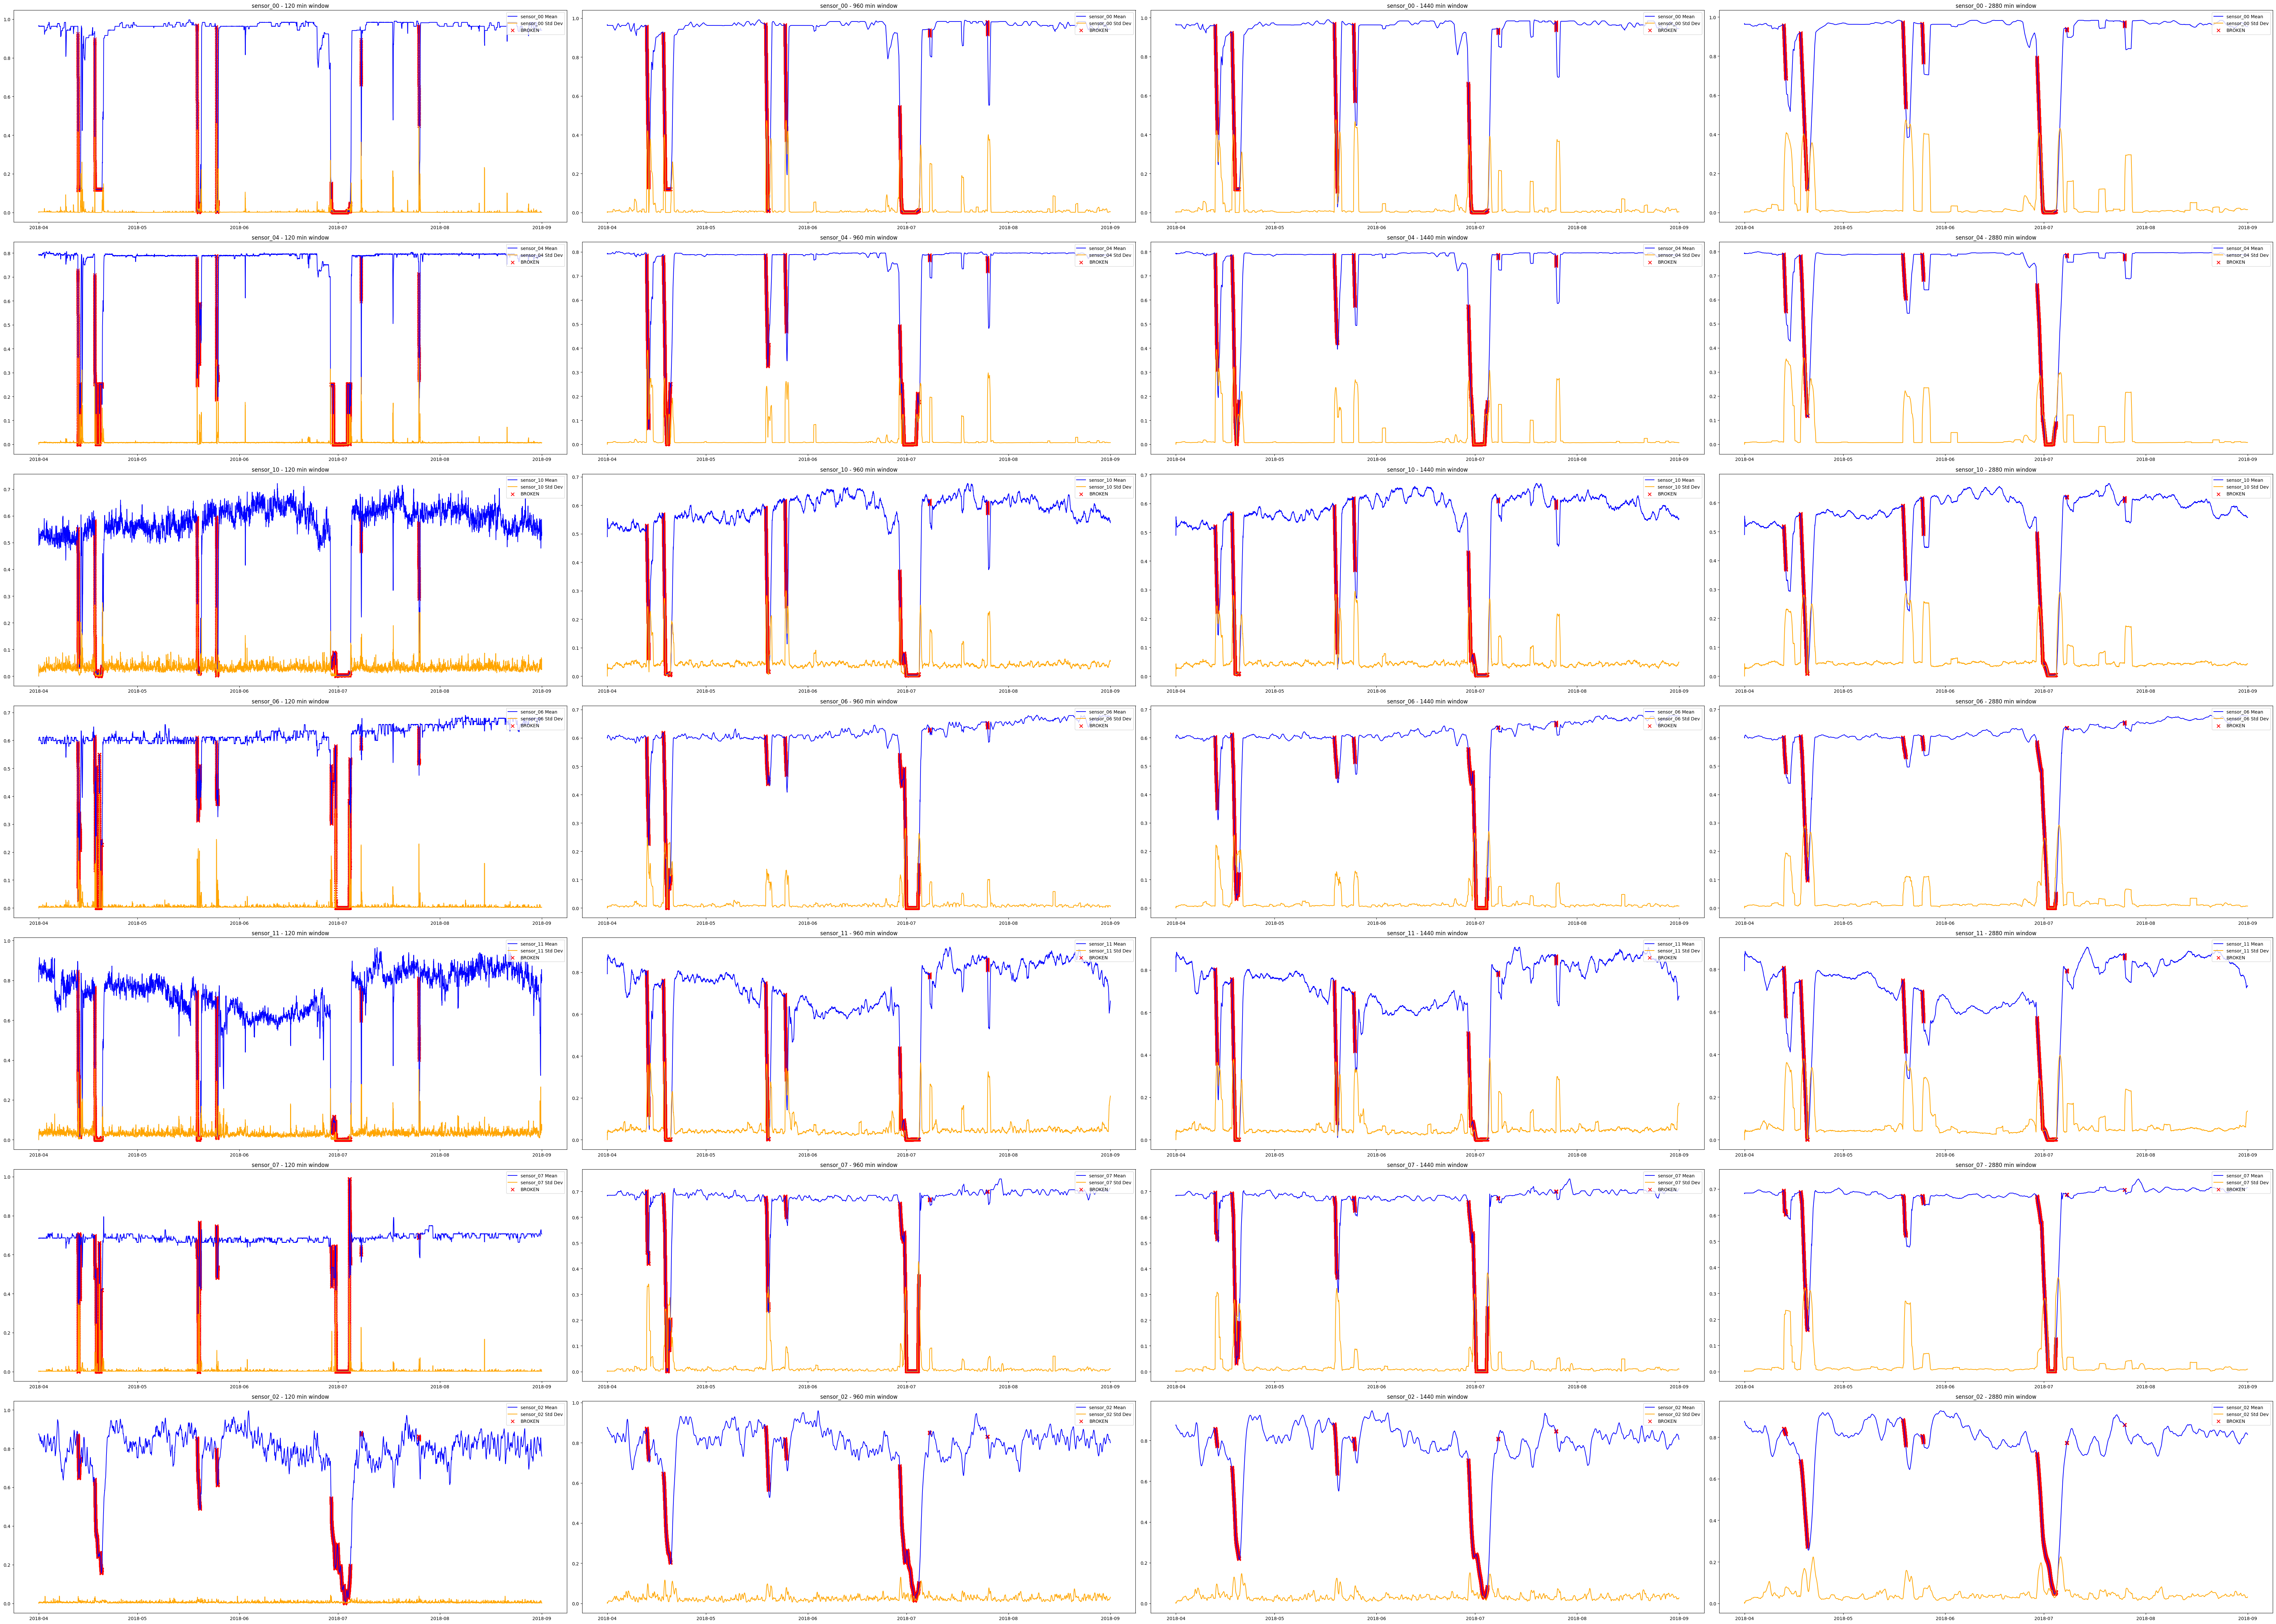

In [5]:
time_window_rolling_stats(df_rolling,df_error,metric_columns,time_windows)

In [6]:
split_time = '2018-06-01'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


=== CONFUSION MATRICES ===
GradientBoost Confusion Matrix: TN: 123886, FP: 85, FN: 45, TP: 8464
RandomForest Confusion Matrix: TN: 123834, FP: 137, FN: 37, TP: 8472
ExtraTrees Confusion Matrix: TN: 123659, FP: 312, FN: 27, TP: 8482
AdaBoost Confusion Matrix: TN: 123607, FP: 364, FN: 31, TP: 8478
LogisticRegression Confusion Matrix: TN: 123433, FP: 538, FN: 48, TP: 8461
SVC Confusion Matrix: TN: 123390, FP: 581, FN: 25, TP: 8484
KNeighbors Confusion Matrix: TN: 123385, FP: 586, FN: 30, TP: 8479
SGD Confusion Matrix: TN: 123331, FP: 640, FN: 48, TP: 8461
GaussianNB Confusion Matrix: TN: 122775, FP: 1196, FN: 7, TP: 8502
Isolation Forest Confusion Matrix: TN: 123746, FP: 225, FN: 1860, TP: 6649
One-Class SVM Confusion Matrix: TN: 121197, FP: 2774, FN: 1541, TP: 6968
DecisionTree Confusion Matrix: TN: 123851, FP: 120, FN: 5329, TP: 3180
BernoulliNB Confusion Matrix: TN: 123871, FP: 100, FN: 7583, TP: 926


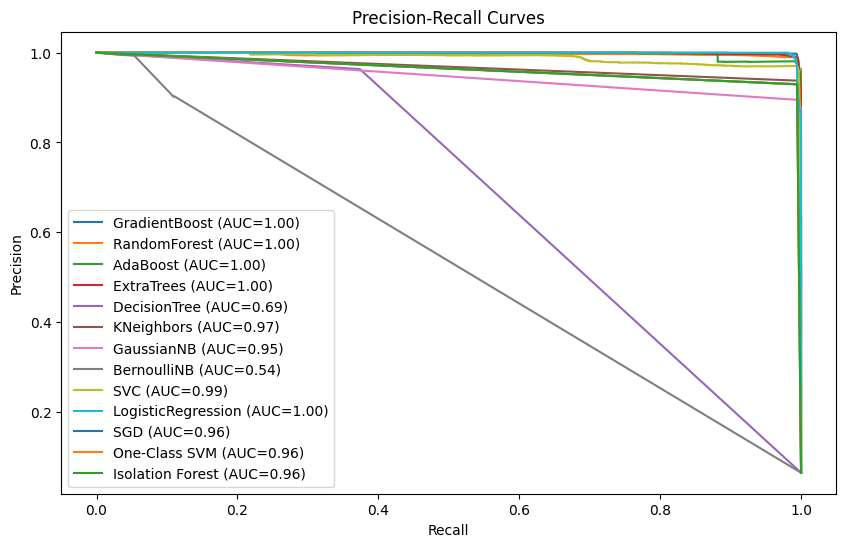

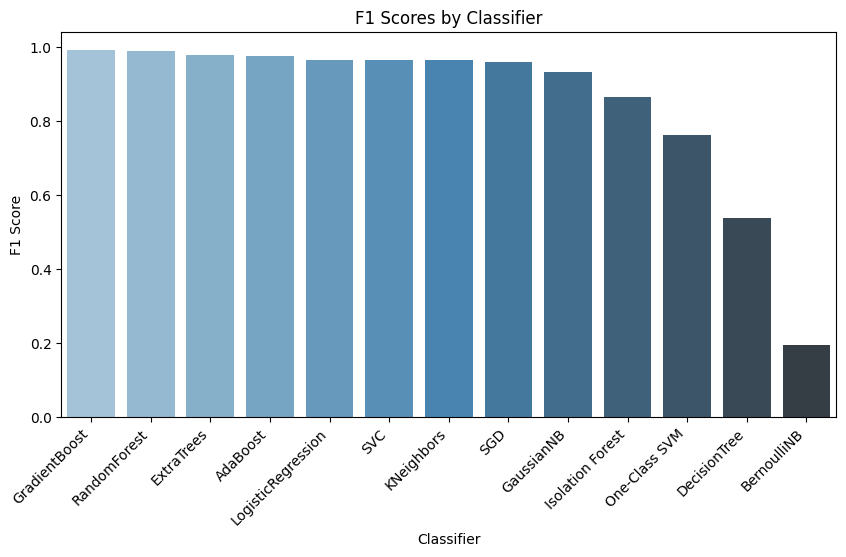

Accuracy Precision    Recall        F1    AUC-PR
GradientBoost       0.999019  0.990057  0.994711  0.992379  0.999613
RandomForest        0.998687  0.984086  0.995652  0.989835  0.996409
ExtraTrees          0.997441  0.964521  0.996827  0.980408  0.999138
AdaBoost            0.997018  0.958833  0.996357  0.977235  0.997249
LogisticRegression  0.995577  0.940216  0.994359   0.96653  0.999191
SVC                 0.995426  0.935907  0.997062  0.965517  0.988504
KNeighbors           0.99535  0.935356  0.996474  0.964948  0.967518
SGD                 0.994807  0.929678  0.994359  0.960931    0.9622
GaussianNB          0.990919  0.876676  0.999177  0.933927   0.94711
Isolation Forest    0.984262  0.967268  0.781408  0.864461    0.9622
One-Class SVM       0.967429  0.715254  0.818898  0.763575    0.9622
DecisionTree        0.958869  0.963636  0.373722  0.538572  0.688792
BernoulliNB         0.942006  0.902534  0.108826  0.194232  0.537451

In [7]:
X_train, X_test, y_train, y_test = test_train_split(df, split_time)

classifier_model_test(X_train, X_test, y_train, y_test)

In [8]:
df_rolling_960_mean = df_rolling[
    [
    'timestamp',
    'sensor_00_960_mean',
    'sensor_04_960_mean',
    'sensor_10_960_mean',
    'sensor_06_960_mean',
    'sensor_11_960_mean',
    'sensor_07_960_mean',
    'sensor_02_960_mean',
    'machine_status_code'
    ]
]

df_rolling_960_mean = df_rolling_960_mean.rename(columns={
                                'sensor_00_960_mean':'sensor_00',
                                'sensor_04_960_mean':'sensor_04',
                                'sensor_10_960_mean':'sensor_10',
                                'sensor_06_960_mean':'sensor_06',
                                'sensor_11_960_mean':'sensor_11',
                                'sensor_07_960_mean':'sensor_07',
                                'sensor_02_960_mean':'sensor_02',
                                    }
                           )

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


=== CONFUSION MATRICES ===
GaussianNB Confusion Matrix: TN: 122512, FP: 1459, FN: 2, TP: 8507
Isolation Forest Confusion Matrix: TN: 123926, FP: 45, FN: 1357, TP: 7152
LogisticRegression Confusion Matrix: TN: 122160, FP: 1811, FN: 492, TP: 8017
SGD Confusion Matrix: TN: 123453, FP: 518, FN: 1793, TP: 6716
KNeighbors Confusion Matrix: TN: 122272, FP: 1699, FN: 1722, TP: 6787
ExtraTrees Confusion Matrix: TN: 121277, FP: 2694, FN: 2295, TP: 6214
SVC Confusion Matrix: TN: 120713, FP: 3258, FN: 2556, TP: 5953
AdaBoost Confusion Matrix: TN: 117887, FP: 6084, FN: 2024, TP: 6485
GradientBoost Confusion Matrix: TN: 118562, FP: 5409, FN: 2471, TP: 6038
RandomForest Confusion Matrix: TN: 114775, FP: 9196, FN: 2204, TP: 6305
DecisionTree Confusion Matrix: TN: 97525, FP: 26446, FN: 2152, TP: 6357
One-Class SVM Confusion Matrix: TN: 74104, FP: 49867, FN: 20, TP: 8489
BernoulliNB Confusion Matrix: TN: 123970, FP: 1, FN: 8268, TP: 241


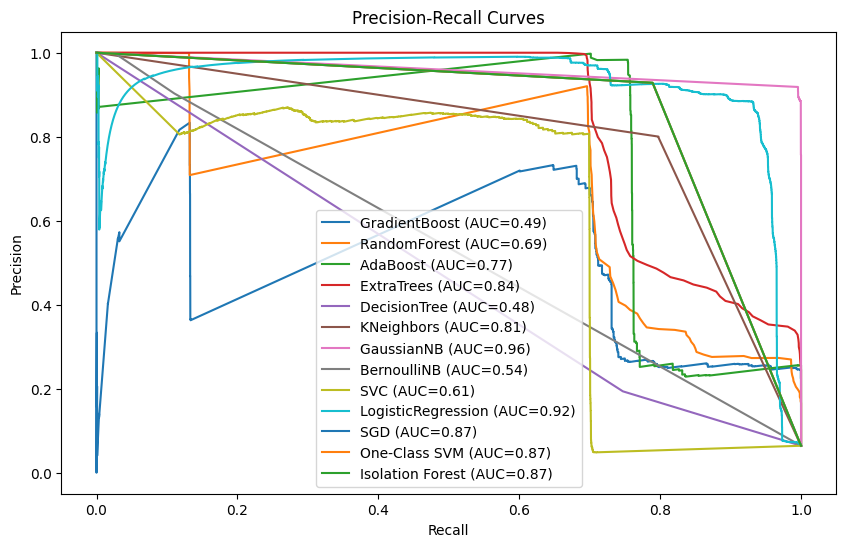

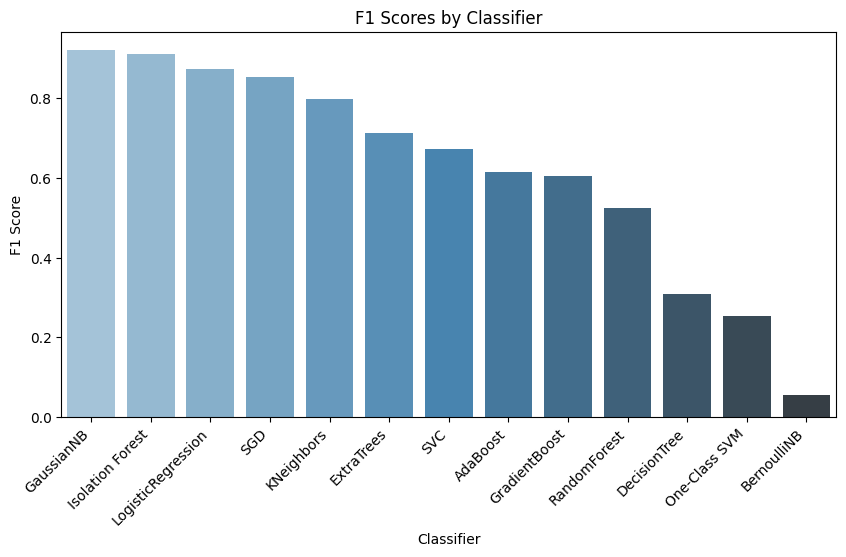

Accuracy Precision    Recall        F1    AUC-PR
GaussianNB          0.988972  0.853602  0.999765   0.92092  0.958902
Isolation Forest    0.989417  0.993747  0.840522  0.910735  0.865605
LogisticRegression  0.982616  0.815731  0.942179  0.874407  0.919081
SGD                 0.982556  0.928394  0.789282  0.853205  0.865605
KNeighbors          0.974177  0.799788  0.797626  0.798706  0.805264
ExtraTrees          0.962341  0.697575  0.730286  0.713556   0.84135
SVC                 0.956114  0.646292  0.699612  0.671896   0.61306
AdaBoost            0.938798  0.515952  0.762134  0.615334  0.772409
GradientBoost       0.940519  0.527474  0.709602  0.605131  0.492597
RandomForest        0.913949  0.406748   0.74098  0.525198  0.694699
DecisionTree        0.784133  0.193793  0.747091  0.307756  0.478564
One-Class SVM       0.623437  0.145469   0.99765  0.253915  0.865605
BernoulliNB         0.937583  0.995868  0.028323  0.055079  0.536438

In [9]:
X_train_960, X_test_960, y_train_960, y_test_960 = test_train_split(df_rolling_960_mean, split_time)
classifier_model_test(X_train_960, X_test, y_train_960, y_test)

In [10]:
df_rolling_3200_mean = df_rolling[
    [
    'timestamp',
    'sensor_00_3200_mean',
    'sensor_04_3200_mean',
    'sensor_10_3200_mean',
    'sensor_06_3200_mean',
    'sensor_11_3200_mean',
    'sensor_07_3200_mean',
    'sensor_02_3200_mean',
    'machine_status_code'
    ]
]

df_rolling_3200_mean = df_rolling_3200_mean.rename(columns={
                                                            'sensor_00_3200_mean':'sensor_00',
                                                            'sensor_04_3200_mean':'sensor_04',
                                                            'sensor_10_3200_mean':'sensor_10',
                                                            'sensor_06_3200_mean':'sensor_06',
                                                            'sensor_11_3200_mean':'sensor_11',
                                                            'sensor_07_3200_mean':'sensor_07',
                                                            'sensor_02_3200_mean':'sensor_02'
                                                            }
                                                    )

KeyError: "['sensor_00_3200_mean', 'sensor_04_3200_mean', 'sensor_10_3200_mean', 'sensor_06_3200_mean', 'sensor_11_3200_mean', 'sensor_07_3200_mean', 'sensor_02_3200_mean'] not in index"

In [ ]:
X_train_3200_mean, X_test_3200_mean, y_train_3200_mean, y_test_3200_mean = test_train_split(df_rolling_3200_mean, split_time)
classifier_model_test(X_train_3200_mean, X_test, y_train_3200_mean, y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


=== CONFUSION MATRICES (text table) ===
[[121356   2615]
 [   804   7705]]
GaussianNB Confusion Matrix: TN: 121356, FP: 2615, FN: 804, TP: 7705 
[[123227    744]
 [  3866   4643]]
Isolation Forest Confusion Matrix: TN: 123227, FP: 744, FN: 3866, TP: 4643 
[[110398  13573]
 [  1202   7307]]
LogisticRegression Confusion Matrix: TN: 110398, FP: 13573, FN: 1202, TP: 7307 
[[122605   1366]
 [  7370   1139]]
AdaBoost Confusion Matrix: TN: 122605, FP: 1366, FN: 7370, TP: 1139 
[[59118 64853]
 [ 1261  7248]]
One-Class SVM Confusion Matrix: TN: 59118, FP: 64853, FN: 1261, TP: 7248 
[[94485 29486]
 [ 6021  2488]]
DecisionTree Confusion Matrix: TN: 94485, FP: 29486, FN: 6021, TP: 2488 
[[117495   6476]
 [  7654    855]]
RandomForest Confusion Matrix: TN: 117495, FP: 6476, FN: 7654, TP: 855 
[[80260 43711]
 [ 7705   804]]
GradientBoost Confusion Matrix: TN: 80260, FP: 43711, FN: 7705, TP: 804 
[[116139   7832]
 [  8281    228]]
KNeighbors Confusion Matrix: TN: 116139, FP: 7832, FN: 8281, TP: 228 


Accuracy Precision    Recall        F1
GaussianNB          0.974192  0.746609  0.905512  0.818418
Isolation Forest    0.965202   0.86189  0.545658   0.66825
LogisticRegression  0.888474  0.349952  0.858738  0.497261
AdaBoost            0.934058  0.454691  0.133858  0.206828
One-Class SVM       0.500951  0.100526  0.851804  0.179829
DecisionTree        0.731982  0.077813  0.292396  0.122916
RandomForest        0.893342  0.116628  0.100482  0.107955
GradientBoost       0.611896  0.018061  0.094488  0.030326
KNeighbors          0.878374  0.028288  0.026795  0.027521
ExtraTrees          0.894143       0.0       0.0       0.0
BernoulliNB         0.935771       0.0       0.0       0.0
SVC                 0.894754       0.0       0.0       0.0
SGD                 0.935771       0.0       0.0       0.0